In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [ ]:
MAX_CARS = 20
MAX_MOVE = 5
RENTAL_REWARD = 10
MOVE_COST = 2
GAMMA = 0.9
THETA = 1e-3

lambda_rental_1, lambda_return_1 = 3, 3
lambda_rental_2, lambda_return_2 = 4, 2

poisson_cache = {}

In [ ]:
def poisson_prob(n, lam):
    if (n, lam) not in poisson_cache:
        poisson_cache[(n, lam)] = poisson.pmf(n, lam)
    return poisson_cache[(n, lam)]

V = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
policy = np.zeros((MAX_CARS + 1, MAX_CARS + 1), dtype=int)

In [ ]:
def expected_return(state, action, V):
    cars_1, cars_2 = state
    cars_1 = min(cars_1 - action, MAX_CARS)
    cars_2 = min(cars_2 + action, MAX_CARS)
    reward = -MOVE_COST * abs(action)
    expected_value = 0

    for rental_1 in range(0, 9):
        for rental_2 in range(0, 9):
            prob_rental = poisson_prob(rental_1, lambda_rental_1) * poisson_prob(rental_2, lambda_rental_2)
            rented_1 = min(cars_1, rental_1)
            rented_2 = min(cars_2, rental_2)
            reward_rental = (rented_1 + rented_2) * RENTAL_REWARD
            cars_1_after = cars_1 - rented_1
            cars_2_after = cars_2 - rented_2

            for return_1 in range(0, 9):
                for return_2 in range(0, 9):
                    prob_return = poisson_prob(return_1, lambda_return_1) * poisson_prob(return_2, lambda_return_2)
                    new_cars_1 = min(cars_1_after + return_1, MAX_CARS)
                    new_cars_2 = min(cars_2_after + return_2, MAX_CARS)
                    prob = prob_rental * prob_return
                    expected_value += prob * (reward_rental + GAMMA * V[new_cars_1, new_cars_2])

    return reward + expected_value

In [ ]:
iteration = 0
while True:
    delta = 0
    new_V = np.copy(V)

    for i in range(MAX_CARS + 1):
        for j in range(MAX_CARS + 1):
            old_value = V[i, j]
            action_values = []

            for action in range(-MAX_MOVE, MAX_MOVE + 1):
                if 0 <= i - action <= MAX_CARS and 0 <= j + action <= MAX_CARS:
                    action_values.append(expected_return((i, j), action, V))
                else:
                    action_values.append(float('-inf'))

            new_V[i, j] = max(action_values)
            policy[i, j] = np.argmax(action_values) - MAX_MOVE
            delta = max(delta, abs(old_value - new_V[i, j]))

    V = new_V
    iteration += 1
    print(f"Iteration {iteration}, Max Value Change: {delta:.4f}")
    if delta < THETA:
        break

Iteration 1, Max Value Change: 66.5500
Iteration 2, Max Value Change: 58.1566
Iteration 3, Max Value Change: 50.8205
Iteration 4, Max Value Change: 44.3603
Iteration 5, Max Value Change: 38.5712
Iteration 6, Max Value Change: 33.3930
Iteration 7, Max Value Change: 28.8299
Iteration 8, Max Value Change: 24.8409
Iteration 9, Max Value Change: 21.3548
Iteration 10, Max Value Change: 18.3078
Iteration 11, Max Value Change: 15.6535
Iteration 12, Max Value Change: 13.3566
Iteration 13, Max Value Change: 11.3850
Iteration 14, Max Value Change: 9.7049
Iteration 15, Max Value Change: 8.2811
Iteration 16, Max Value Change: 7.0780
Iteration 17, Max Value Change: 6.0626
Iteration 18, Max Value Change: 5.2047
Iteration 19, Max Value Change: 4.4785
Iteration 20, Max Value Change: 3.8621
Iteration 21, Max Value Change: 3.3373
Iteration 22, Max Value Change: 2.8889
Iteration 23, Max Value Change: 2.5048
Iteration 24, Max Value Change: 2.1748
Iteration 25, Max Value Change: 1.8905
Iteration 26, Max Val

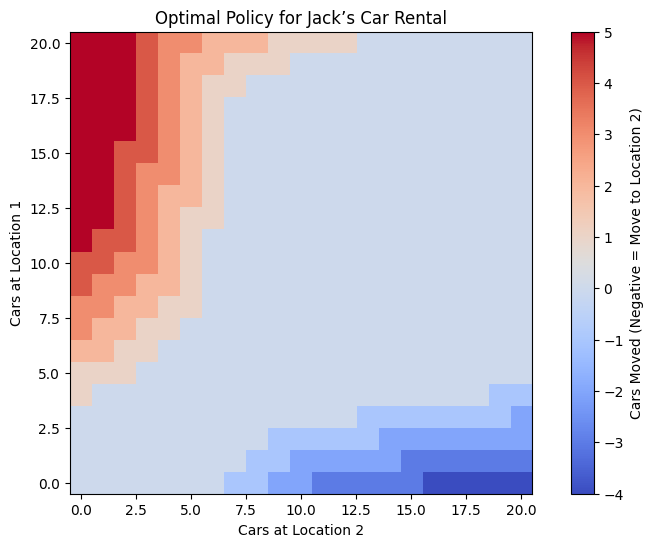

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(policy, origin='lower', cmap='coolwarm')
plt.colorbar(label='Cars Moved (Negative = Move to Location 2)')
plt.xlabel('Cars at Location 2')
plt.ylabel('Cars at Location 1')
plt.title('Optimal Policy for Jack’s Car Rental')
plt.show()